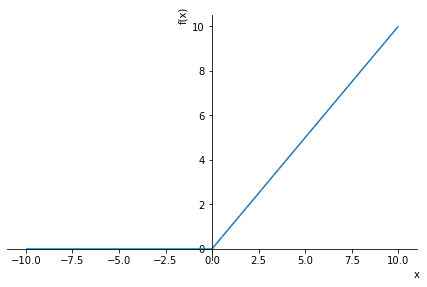

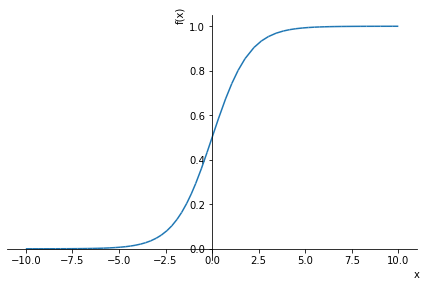

In [1]:
# plotting ReLU activation function and Logistic activation function

from sympy import *

x = symbols('x')

relu = Max(0, x)
plot(relu)

logistic = 1 / (1 + exp(-x))
plot(logistic)

In [2]:
# A simple forward propagation network with random weight and bias values

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv('https://tinyurl.com/y2qmhfsr')

# extract the input columns, scale down by 255
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, 3].values

# split train & test data sets
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size = 1/3, stratify=all_outputs)
n = X_train.shape[0]  # no. of training records

# build the simple neural network with weights and biases with random initialization
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# print the Weights and Biases
print('Weight_hidden values: \n{0}'.format(w_hidden))
print('Weight_output values: \n{0}'.format(w_output))
print('Biases_hidden values: \n{0}'.format(b_hidden))
print('Biases_output values: \n{0}'.format(b_output))

# setting up Activation Functions
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# runs inputs through the neural network to get predicted outputs
def forward_propagation(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    print('Z1 matrix: \n{0}'.format(Z1))
    print('A1 matrix: \n{0}'.format(A1))
    print('Z2 matrix: \n{0}'.format(Z2))
    print('A2 matrix: \n{0}'.format(A2))
    return Z1, A1, Z2, A2


# calculate Accuracy 
test_predictions = forward_propagation(X_test.transpose())[3]  # grab only output layer A2
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)  # only grab the A2 vector with predictions >= 0.5
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0]) # percentage of correct predictions

print('Accuracy : {0:.5f}'.format(accuracy))  # flipping a coin yields 0.5 accuracy, hence our random weights & biases might as well be due to random chance. 

Weight_hidden values: 
[[0.64478128 0.6699968  0.84886243]
 [0.43007702 0.48662718 0.62259343]
 [0.84994841 0.08346358 0.17296838]]
Weight_output values: 
[[0.73868548 0.28639114 0.16393065]]
Biases_hidden values: 
[[0.55800481]
 [0.65362364]
 [0.44585191]]
Biases_output values: 
[[0.09830728]]
Z1 matrix: 
[[1.77134047 2.27282999 1.66095174 ... 2.37376587 1.5561921  1.54912797]
 [1.51683761 1.88481562 1.4193536  ... 1.94542636 1.37230577 1.35444604]
 [1.06629267 1.13282692 1.30525771 ... 1.37434367 0.78107666 0.95262313]]
A1 matrix: 
[[1.77134047 2.27282999 1.66095174 ... 2.37376587 1.5561921  1.54912797]
 [1.51683761 1.88481562 1.4193536  ... 1.94542636 1.37230577 1.35444604]
 [1.06629267 1.13282692 1.30525771 ... 1.37434367 0.78107666 0.95262313]]
Z2 matrix: 
[[2.01597768 2.50271336 1.94569026 1.21487029 0.77077815 2.34628875
  1.25533108 2.1331926  2.30333142 2.38775436 1.64211242 2.83893505
  2.65036123 2.92157734 2.17552093 2.81506259 2.06541789 1.40218648
  1.71597891 1.85923928 

In [3]:
# calculating all the partial derivatives we need for our neural network based on the Cost Function C. 
# multiplying the gradients together to get a measure of how much a change to W2 will change the cost function C. 

from sympy import *

W1, W2, B1, B2, A1, A2, Z1, Z2, X, Y = symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

# calculating derivative of Cost Function C with respect to A2
C = (A2 - Y)**2
dC_dA2 = diff(C, A2)
print('dC/dA2: \n{0}'.format(dC_dA2))

# calculating derivative of A2 with respect to Z2
logistic = lambda x: 1 / (1 + exp(-x))
A2 = logistic(Z2)
dA2_dZ2 = diff(A2, Z2)  # taking the derivative of a Sigmoid curve
print('dA2/dZ2: \n{0}'.format(dA2_dZ2))

# calculating the derivative of Z2 with respect to W2
Z2 = W2 * A1 + B2
dZ2_dW2 = diff(Z2, W2)
print('dZ2/dW2: \n{0}'.format(dZ2_dW2))

# calculating the derivative of Z2 with respect to A1
Z2 = W2 * A1 + B2
dZ2_dA1 = diff(Z2, A1)
print('dZ2/dA1: \n{0}'.format(dZ2_dA1))

# calculating the derivative of Z2 with respect to A1
Z2 = W2 * A1 + B2
dZ2_dB2 = diff(Z2, B2)
print('dZ2/dB2: \n{0}'.format(dZ2_dB2))

# calculating the derivative of A1 with respect to Z1
relu = lambda x: Max(x,0)
d_relu = lambda x: x > 0. # Slope is 1 if positive, 0 if negative
A1 = relu(Z1)
dA1_dZ1 = d_relu(Z1)
print('dA1/dZ1: \n{0}'.format(dA1_dZ1))

# calculating the derivative of Z1 with respect to W1
Z1 = W1 * X + B1
dZ1_dW1 = diff(Z1, W1)
print('dZ1/dW1: \n{0}'.format(dZ1_dW1))

# calculating the derivative of Z1 with respect to B1
Z1 = W1 * X + B1
dZ1_dB1 = diff(Z1, B1)
print('dZ1/dB1: \n{0}'.format(dZ1_dB1))

# calculating C with respect to W2
dC_dW2 = dC_dA2 * dA2_dZ2 * dZ2_dW2
print('dC/dW2: \n{0}'.format(dC_dW2))

# calculating C with respect to B2
dC_dB2 = dC_dA2 * dA2_dZ2 * dZ2_dB2
print('dC/dB2: \n{0}'.format(dC_dB2))

# calculating C with respect to W1
# dC_dW1 = dC_dA2 * dA2_dZ2 * dZ2_dA1 * dA1_dZ1 * dZ1_dW1  # showing error as unsupported operand type(s) for *: 'Mul' and 'StrictGreaterThan'
# print('dC/dW1: \n{0}'.format(dC_dW1))

# calculating C with respect to B1
# dC_dB1 = dC_dA2 * dA2_dZ2 * dZ2_dA1 * dA1_dZ1 * dZ1_dB1  # showing error as unsupported operand type(s) for *: 'Mul' and 'StrictGreaterThan'
# print('dC/dB1: \n{0}'.format(dC_dB1))

dC/dA2: 
2*A2 - 2*Y
dA2/dZ2: 
exp(-Z2)/(1 + exp(-Z2))**2
dZ2/dW2: 
A1
dZ2/dA1: 
W2
dZ2/dB2: 
1
dA1/dZ1: 
Z1 > 0.0
dZ1/dW1: 
X
dZ1/dB1: 
1
dC/dW2: 
A1*(2*A2 - 2*Y)*exp(-Z2)/(1 + exp(-Z2))**2
dC/dB2: 
(2*A2 - 2*Y)*exp(-Z2)/(1 + exp(-Z2))**2


In [ ]:
# Implementing a neural network with Backpropagated Stochastic Gradient Descent

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv('https://tinyurl.com/y2qmhfsr')

# setting the Learning rate, which controls how slowly we approach a solution
# make it too small -> will take too long to run. 
# make it too large -> will likely overshoot and miss the solution. 

L = 0.05

# extract the input columns, scale down by 255. 
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, 3].values

# split train & test data sets
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size = 1/3, stratify=all_outputs)
n = X_train.shape[0]  # no. of training records

# build the simple neural network with weights and biases with random initialization
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)
b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# print the Weights and Biases
print('Weight_hidden values: \n{0}'.format(w_hidden))
print('Weight_output values: \n{0}'.format(w_output))
print('Biases_hidden values: \n{0}'.format(b_hidden))
print('Biases_output values: \n{0}'.format(b_output))

# setting up Activation Functions
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# derivatives of Activation functions
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# runs inputs through the neural network to get predicted outputs
def forward_propagation(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2


# return Slopes/Gradients for weights and biases using Chain Rule
def backward_propagation(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2*A2 - 2*Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dW2 = A1
    dZ2_dA1 = w_output
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1
    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T
    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2
    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1
    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T
    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1
    
    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# execute stochastic gradient descent
for i in range(100000):
    idx = np.random.choice(n, 1, replace=False)  # randomly select one of the training data
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]
    
    # run randomly selected training data through neural network
    Z1, A1, Z2, A2 = forward_propagation(X_sample)
    
    # distribute error through Backpropagation & return Slopes/Gradients for Weights and Biases
    dW1, dB1, dW2, dB2 = backward_propagation(Z1, A1, Z2, A2, X_sample, Y_sample)
    
    # update Weights and Biases
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2
    
    
# calculate Accuracy 
test_predictions = forward_propagation(X_test.transpose())[3]  # grab only output layer A2
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)  # only grab the A2 vector with predictions >= 0.5
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0]) # percentage of correct predictions

print('Accuracy : {0:.5f}'.format(accuracy))  # flipping a coin yields 0.5 accuracy, hence our random weights & biases might as well be due to random chance. 

# interact and test with new RGB colours
def predict_probability(R, G, B):
    X = np.array([[R, G, B]]).transpose() / 255.0
    Z1, A1, Z2, A2 = forward_propagation(X)
    return A2  # return the output layer output A2

def predict_font_shade(R, G, B):
    output_values = predict_probability(R, G, B)
    if output_values > 0.5: 
        return 'Suggest using DARK fonts'
    else: 
        return 'Suggest using LIGHT fonts'
    
while True:
    col_input = input('Predict light or dark font.\n Input values R, G, B: ')
    (R, G, B) = col_input.split(',')
    print('Model suggestion: \n{0}'.format(predict_font_shade(int(R), int(G), int(B))))



Weight_hidden values: 
[[3.58076647e-02 2.31700165e-04 8.94598495e-01]
 [3.82885181e-01 7.42452404e-01 7.59119997e-01]
 [3.08783907e-01 6.53873027e-01 8.84630387e-02]]
Weight_output values: 
[[0.5032859  0.74893945 0.19345512]]
Biases_hidden values: 
[[0.47408226]
 [0.61654355]
 [0.40237613]]
Biases_output values: 
[[0.50457348]]
Accuracy : 0.98886
